<a href="https://colab.research.google.com/github/Adityabaan/Basic-AI-Algorithms/blob/main/Eight_Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

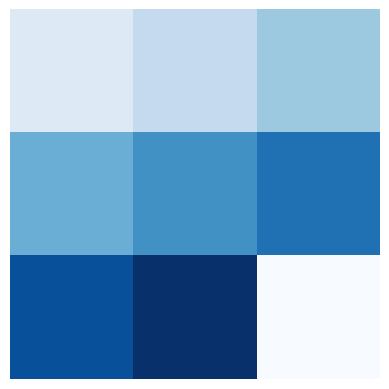

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from queue import PriorityQueue
from IPython.display import HTML
import numpy as np

# Define the goal state
GOAL_STATE = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

# Helper function to find the position of the blank tile (0)
def find_blank(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == 0:
                return i, j

# Generate possible moves
def get_neighbors(state):
    moves = []
    x, y = find_blank(state)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < 3 and 0 <= ny < 3:
            new_state = [row[:] for row in state]
            new_state[x][y], new_state[nx][ny] = new_state[nx][ny], new_state[x][y]
            moves.append(new_state)
    return moves

# Heuristic function: Manhattan distance
def manhattan_distance(state):
    distance = 0
    for i in range(3):
        for j in range(3):
            value = state[i][j]
            if value != 0:
                target_x, target_y = divmod(value - 1, 3)
                distance += abs(target_x - i) + abs(target_y - j)
    return distance

# A* algorithm to solve the puzzle
def solve_puzzle(start_state):
    pq = PriorityQueue()
    pq.put((manhattan_distance(start_state), 0, start_state, []))
    visited = set()
    while not pq.empty():
        _, cost, current_state, path = pq.get()
        visited.add(tuple(map(tuple, current_state)))
        if current_state == GOAL_STATE:
            return path + [current_state]
        for neighbor in get_neighbors(current_state):
            if tuple(map(tuple, neighbor)) not in visited:
                pq.put((manhattan_distance(neighbor) + cost + 1, cost + 1, neighbor, path + [current_state]))
    return []

# Animation setup
def animate_puzzle(solution_steps):
    fig, ax = plt.subplots()
    ax.axis('off')
    mat = ax.matshow(solution_steps[0], cmap="Blues")

    def update(frame):
        mat.set_array(solution_steps[frame])
        return mat,

    ani = animation.FuncAnimation(
        fig, update, frames=len(solution_steps), interval=500, blit=True
    )

    # Save as HTML and display in Colab
    return HTML(ani.to_html5_video())

# Define the initial state
initial_state = [[1, 2, 3], [4, 0, 5], [7, 8, 6]]

# Solve the puzzle and get the solution steps
solution = solve_puzzle(initial_state)

# Animate and display the solution
animate_puzzle(solution)
